In [1]:
import sys
import os
from skimage import exposure
import pandas as pd 
import numpy as np 
import cv2
import glob
from helpers import *
import matplotlib.pyplot as plt
%matplotlib inline

c:\Users\line\Desktop\Mauro\5_Thickness\OCT_thickness\../../2_Preprocessing_Code/amd/prl\dataset.py:8: FutureWarning: The `skimage.morphology.selem` module is deprecated and will be removed in scikit-image 1.0 (`skimage.morphology.selem` has been moved to `skimage.morphology.footprints`).
  from skimage.morphology import selem


In [2]:
X, y = getBalancedStackedXYData()
print(X.shape)
print(y.shape)

X_NoNorm, _ = getBalancedStackedXYData(normmode_thick = None)
print(X.shape)


(193536, 75)
(193536,)
(193536, 75)


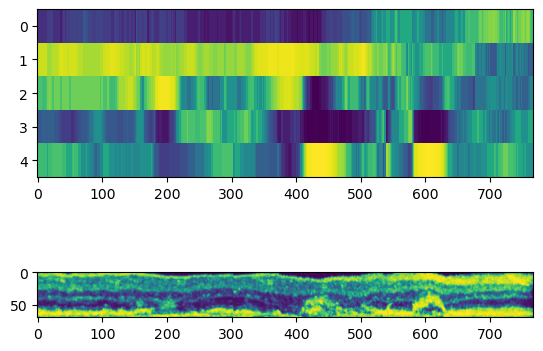

In [3]:
fig, axes = plt.subplots(2,1)
axes[1].imshow(X[-768:,:-5].transpose()) 
axes[0].imshow(X[-768:,-5:].transpose(), aspect='auto', interpolation='nearest')

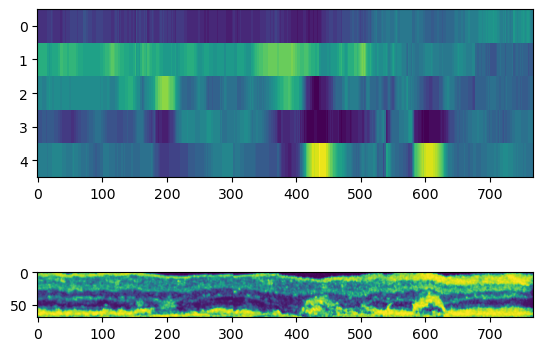

In [4]:
fig, axes = plt.subplots(2,1)
axes[1].imshow(X_NoNorm[-768:,:-5].transpose()) 
axes[0].imshow(X_NoNorm[-768:,-5:].transpose(), aspect='auto', interpolation='nearest')

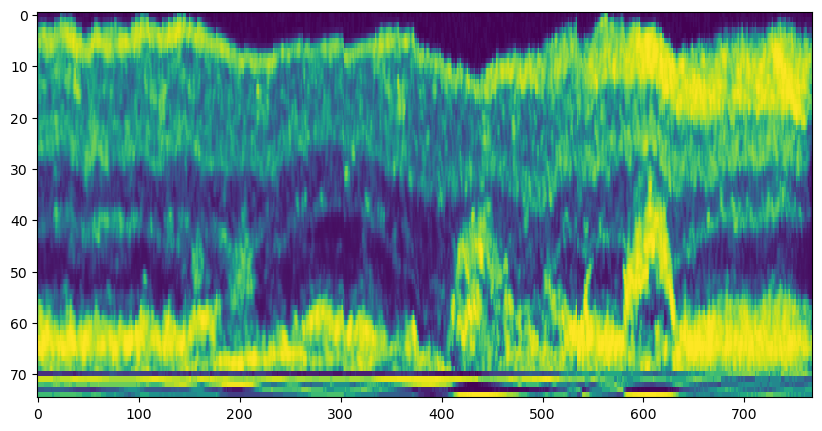

In [5]:
fig, axes = plt.subplots(1,1, figsize = (10,5))
axes.imshow(X[-768:,:].transpose(), aspect='auto', interpolation='nearest')

In [6]:
print(X[:,-5:].min())
print(X[:,-5:].max())
thickness = X[:,-5:]
argmax_indices = np.unravel_index(np.argmax(thickness, axis=None), thickness.shape)
print("argmax indices:", argmax_indices)
print(thickness[argmax_indices])

0.00026041666666666666
1.0
argmax indices: (333, 3)
1.0


In [7]:
print(X[:,:-5].min())
print(X[:,:-5].max())
OCTs = X[:,:-5]
argmax_indices = np.unravel_index(np.argmax(OCTs, axis=None), OCTs.shape)
print("argmax indices:", argmax_indices)
print(OCTs[argmax_indices])

0.004523732817869416
1.0
argmax indices: (36, 66)
1.0


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>, <AxesSubplot:>]], dtype=object)

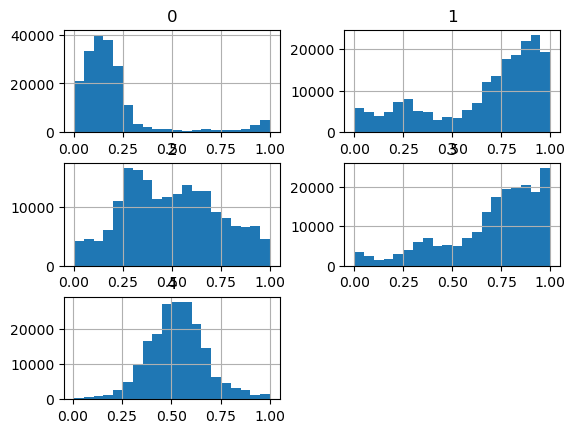

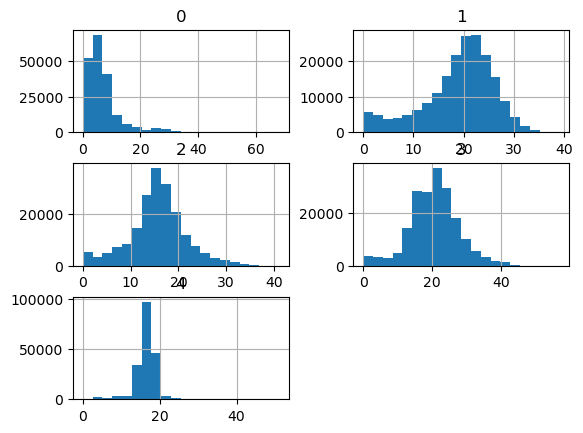

In [8]:
# compare the distribution of the values in the thickness, with normalization or not
df_thickness = pd.DataFrame(thickness)
df_thickness.hist(bins=20)

norm_thickness = X_NoNorm[:, -5:]
df_thickness = pd.DataFrame(norm_thickness)
df_thickness.hist(bins=20)
